In [1]:
%matplotlib inline
from pathlib import Path

datasets_path = Path("../datasets")

In [2]:
import polars as pl
import polars.selectors as cs

train_csv_path = datasets_path / "train.csv"
test_csv_path = datasets_path / "test.csv"

train_df = pl.read_csv(train_csv_path)
test_df = pl.read_csv(test_csv_path).with_columns(pl.lit(None).alias("charges"))
merged_df = pl.concat([train_df, test_df])

In [3]:
train_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",1600.0,1600.0,"""1600""",1600.0,1600.0,"""1600""","""1600""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",1007.8625,38.985,null,32.424376,1.014375,null,null,0.30625
"""std""",575.26841,13.555012,null,5.766915,1.259031,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",516.0,27.0,null,28.638079,0.0,null,null,0.0
"""50%""",1011.0,40.0,null,32.270707,1.0,null,null,0.0
"""75%""",1509.0,50.0,null,37.066816,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


In [4]:
test_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",400.0,400.0,"""400""",400.0,400.0,"""400""","""400""",0.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",966.05,39.23,null,32.668659,0.9425,null,null,null
"""std""",585.848127,12.990149,null,5.9328,1.219801,null,null,null
"""min""",13.0,18.0,"""female""",21.848978,0.0,"""no""","""northeast""",null
"""25%""",432.0,28.0,null,28.712189,0.0,null,null,null
"""50%""",972.0,40.0,null,32.288571,0.0,null,null,null
"""75%""",1458.0,50.0,null,37.110462,2.0,null,null,null
"""max""",1995.0,64.0,"""male""",46.890354,5.0,"""yes""","""southwest""",null


In [5]:
merged_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",2000.0,2000.0,"""2000""",2000.0,2000.0,"""2000""","""2000""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",999.5,39.034,null,32.473233,1.0,null,null,0.30625
"""std""",577.494589,13.4411,null,5.799794,1.251312,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",500.0,27.0,null,28.645793,0.0,null,null,0.0
"""50%""",1000.0,40.0,null,32.275964,1.0,null,null,0.0
"""75%""",1499.0,50.0,null,37.092476,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


## 特徴量の生成

### bmi

In [6]:
# https://www.e-healthnet.mhlw.go.jp/information/food/e-02-001.html

bmi_col = pl.col("bmi")
bmi_enum = pl.Enum(
    [
        "Underweight",
        "Normal range",
        "Pre-obese",
        "Obese class I",
        "Obese class II",
        "Obese class III",
    ]
)
bmi_class = merged_df.select(
    pl.when(bmi_col < 18.5)
    .then(pl.lit("Underweight"))
    .when(bmi_col < 25.0)
    .then(pl.lit("Normal range"))
    .when(bmi_col < 30.0)
    .then(pl.lit("Pre-obese"))
    .when(bmi_col < 35.0)
    .then(pl.lit("Obese class I"))
    .when(bmi_col < 40.0)
    .then(pl.lit("Obese class II"))
    .otherwise(pl.lit("Obese class III"))
    .cast(pl.Categorical)
    .alias("bmi_class")
)

bmi_mean_diff = merged_df.select((bmi_col.mean() - bmi_col).alias("bmi_mean_diff"))
bmi_std_diff = merged_df.select((bmi_col.std() - bmi_col).alias("bmi_std_diff"))
bmi_std_score = merged_df.select(
    ((bmi_col - bmi_col.mean()) / bmi_col.std()).alias("bmi_std_score")
)

bmi_square = merged_df.select((bmi_col * bmi_col).alias("bmi_square"))

/tmp/ipykernel_47854/3332682662.py:14: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  bmi_class = merged_df.select(


### 年齢

In [7]:
# http://jaee.umin.jp/doc/agegroup.pdf

age_col = pl.col("age")

age_enum = pl.Enum(
    [
        "infant",
        "lower_elementary",
        "higher_elementary",
        "junior_high",
        "senior_high",
        "young_adult",
        "old_adult",
        "young_elder",
        "old_elder",
    ]
)
age_class = merged_df.select(
    pl.when(age_col < 6)
    .then(pl.lit("infant"))
    .when(age_col < 9)
    .then(pl.lit("lower_elementary"))
    .when(age_col < 12)
    .then(pl.lit("higher_elementary"))
    .when(age_col < 15)
    .then(pl.lit("junior_high"))
    .when(age_col < 18)
    .then(pl.lit("senior_high"))
    .when(age_col < 39)
    .then(pl.lit("young_adult"))
    .when(age_col < 64)
    .then(pl.lit("old_adult"))
    .when(age_col < 74)
    .then(pl.lit("young_elder"))
    .otherwise(pl.lit("old_elder"))
    .cast(pl.Categorical)
    .alias("age_class")
)

age_mean_diff = merged_df.select((age_col.mean() - age_col).alias("age_mean_diff"))
age_std_diff = merged_df.select((age_col.std() - age_col).alias("age_std_diff"))
age_std_score = merged_df.select(
    ((age_col - age_col.mean()) / age_col.std()).alias("age_std_score")
)

age_square = merged_df.select((age_col * age_col).alias("age_square"))

### ビン化

In [8]:
def col_binned(df: pl.DataFrame, name: str, n: int):
    alias = f"{name}_binned_{n}"
    alias_brk = f"{alias}_brk"
    binned = (
        df.select(
            pl.col(name).qcut(quantiles=n, include_breaks=True).alias(alias),
            pl.col(name),
        )
        .unnest(alias)
        .select(
            cs.exclude("brk"),
            pl.when(pl.col("brk").is_infinite())
            .then(pl.col(name).max())
            .otherwise(pl.col("brk"))
            .alias(alias_brk),
        )
        .select(
            (pl.col(alias_brk) - pl.col(name)).alias(f"{alias_brk}_sub"),
            (pl.col(alias_brk) / pl.col(name)).alias(f"{alias_brk}_div"),
            pl.col(f"{name}_bin").alias(alias),
            pl.col(alias_brk),
        )
    )
    return binned


In [9]:
bmi_binned_3 = col_binned(merged_df, "bmi", 3)
bmi_binned_4 = col_binned(merged_df, "bmi", 4)
bmi_binned_5 = col_binned(merged_df, "bmi", 5)
bmi_binned_7 = col_binned(merged_df, "bmi", 7)
age_binned_3 = col_binned(merged_df, "age", 3)
age_binned_4 = col_binned(merged_df, "age", 4)
age_binned_5 = col_binned(merged_df, "age", 5)
age_binned_7 = col_binned(merged_df, "age", 7)

binned_dfs = [
    bmi_binned_3,
    bmi_binned_4,
    bmi_binned_5,
    bmi_binned_7,
    age_binned_3,
    age_binned_4,
    age_binned_5,
    age_binned_7,
]

In [10]:
charges_col = pl.col("charges")
charges_types = (
    merged_df.select(charges_col).to_dummies().select(cs.exclude("charges_null"))
)
charges_types

charges_0,charges_1,charges_2
u8,u8,u8
1,0,0
1,0,0
0,1,0
1,0,0
1,0,0
…,…,…
0,0,0
0,0,0
0,0,0


In [11]:
bmi_binned_3 = col_binned(merged_df, "bmi", 3)
bmi_binned_4 = col_binned(merged_df, "bmi", 4)
bmi_binned_5 = col_binned(merged_df, "bmi", 5)
bmi_binned_7 = col_binned(merged_df, "bmi", 7)
age_binned_3 = col_binned(merged_df, "age", 3)
age_binned_4 = col_binned(merged_df, "age", 4)
age_binned_5 = col_binned(merged_df, "age", 5)
age_binned_7 = col_binned(merged_df, "age", 7)

binned_dfs = [
    bmi_binned_3,
    bmi_binned_4,
    bmi_binned_5,
    bmi_binned_7,
    age_binned_3,
    age_binned_4,
    age_binned_5,
    age_binned_7,
]

In [12]:
all_data = (
    pl.concat(
        [
            merged_df,
            bmi_class,
            bmi_mean_diff,
            bmi_std_diff,
            bmi_std_score,
            bmi_square,
            age_class,
            age_mean_diff,
            age_std_diff,
            age_std_score,
            age_square,
            # charges_types,
            *binned_dfs,
        ],
        how="horizontal",
    )
    # .select(cs.exclude("smoker"))
    .with_columns(cs.string().cast(pl.Categorical))
    .with_columns(cs.categorical().to_physical().cast(pl.Int32))
)

all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_std_score,bmi_square,age_class,age_mean_diff,age_std_diff,age_std_score,age_square,bmi_binned_3_brk_sub,bmi_binned_3_brk_div,bmi_binned_3,bmi_binned_3_brk,bmi_binned_4_brk_sub,bmi_binned_4_brk_div,bmi_binned_4,bmi_binned_4_brk,bmi_binned_5_brk_sub,bmi_binned_5_brk_div,bmi_binned_5,bmi_binned_5_brk,bmi_binned_7_brk_sub,bmi_binned_7_brk_div,bmi_binned_7,bmi_binned_7_brk,age_binned_3_brk_sub,age_binned_3_brk_div,age_binned_3,age_binned_3_brk,age_binned_4_brk_sub,age_binned_4_brk_div,age_binned_4,age_binned_4_brk,age_binned_5_brk_sub,age_binned_5_brk_div,age_binned_5,age_binned_5_brk,age_binned_7_brk_sub,age_binned_7_brk_div,age_binned_7,age_binned_7_brk
i64,i64,i32,f64,i64,i32,i32,i64,i32,f64,f64,f64,f64,i32,f64,f64,f64,i64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64
0,26,0,32.665465,3,0,0,0,0,-0.192232,-26.865671,0.033145,1067.032581,0,13.034,-12.5589,-0.969712,676,0.927674,1.028399,1,33.593139,4.427065,1.135527,2,37.092529,0.363798,1.011137,2,33.029262,0.145767,1.004462,3,32.811232,5.0,1.192308,0,31.0,1.0,1.038462,0,27.0,0.0,1.0,0,26.0,2.0,1.076923,1,28.0
1,41,0,29.798725,1,0,1,0,1,2.674508,-23.998931,-0.461138,887.963996,1,-1.966,-27.5589,0.146268,1681,3.794414,1.127335,1,33.593139,2.474611,1.083044,1,32.273336,3.230538,1.108412,2,33.029262,1.695613,1.056902,2,31.494337,5.0,1.121951,1,46.0,9.0,1.219512,2,50.0,3.0,1.073171,2,44.0,1.0,1.02439,3,42.0
2,28,0,32.722029,0,1,2,1,0,-0.248796,-26.922235,0.042897,1070.731191,0,11.034,-14.5589,-0.820915,784,0.87111,1.026622,1,33.593139,4.3705,1.133564,2,37.092529,0.307233,1.009389,2,33.029262,0.089203,1.002726,3,32.811232,3.0,1.107143,0,31.0,12.0,1.428571,1,40.0,6.0,1.214286,1,34.0,0.0,1.0,1,28.0
3,20,1,38.429831,2,0,0,0,2,-5.956598,-32.630037,1.027036,1476.85191,0,19.034,-6.5589,-1.416104,400,8.860813,1.230571,2,47.290644,8.860813,1.230571,3,47.290644,8.860813,1.230571,4,47.290644,0.078778,1.00205,5,38.508609,11.0,1.55,0,31.0,7.0,1.35,0,27.0,6.0,1.3,0,26.0,2.0,1.1,0,22.0
4,45,1,29.641854,1,0,2,0,1,2.831379,-23.84206,-0.488186,878.639491,1,-5.966,-31.5589,0.443862,2025,3.951285,1.133301,1,33.593139,2.631482,1.088776,1,32.273336,0.004672,1.000158,1,29.646526,1.852484,1.062496,2,31.494337,1.0,1.022222,1,46.0,5.0,1.111111,2,50.0,7.0,1.155556,3,52.0,4.0,1.088889,4,49.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,1,24.91598,1,0,2,null,4,7.557252,-19.116187,-1.303021,620.806079,1,-7.966,-33.5589,0.59266,2209,4.218177,1.169296,0,29.134157,3.729589,1.149687,0,28.645569,3.323673,1.133395,0,28.239653,0.600778,1.024112,0,25.516758,17.0,1.361702,2,64.0,3.0,1.06383,2,50.0,5.0,1.106383,3,52.0,2.0,1.042553,4,49.0
1972,18,1,44.752922,0,0,0,null,3,-12.279689,-38.953128,2.117263,2002.824048,0,21.034,-4.5589,-1.564902,324,2.537722,1.056705,2,47.290644,2.537722,1.056705,3,47.290644,2.537722,1.056705,4,47.290644,2.537722,1.056705,6,47.290644,13.0,1.722222,0,31.0,9.0,1.5,0,27.0,8.0,1.444444,0,26.0,4.0,1.222222,0,22.0
1979,33,1,37.203015,0,1,0,null,2,-4.729783,-31.403222,0.815509,1384.064357,0,6.034,-19.5589,-0.448922,1089,10.087628,1.271151,2,47.290644,10.087628,1.271151,3,47.290644,0.574246,1.015435,3,37.777261,1.305593,1.035094,5,38.508609,13.0,1.393939,1,46.0,7.0,1.212121,1,40.0,1.0,1.030303,1,34.0,3.0,1.090909,2,36.0


In [13]:
categorical_features = (
    all_data.select(
        cs.string(include_categorical=True),
        pl.col(pl.Enum),
    )
    .select(pl.exclude("charges"))
    .columns
)

In [14]:
categorical_features

[]

In [15]:
all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_std_score,bmi_square,age_class,age_mean_diff,age_std_diff,age_std_score,age_square,bmi_binned_3_brk_sub,bmi_binned_3_brk_div,bmi_binned_3,bmi_binned_3_brk,bmi_binned_4_brk_sub,bmi_binned_4_brk_div,bmi_binned_4,bmi_binned_4_brk,bmi_binned_5_brk_sub,bmi_binned_5_brk_div,bmi_binned_5,bmi_binned_5_brk,bmi_binned_7_brk_sub,bmi_binned_7_brk_div,bmi_binned_7,bmi_binned_7_brk,age_binned_3_brk_sub,age_binned_3_brk_div,age_binned_3,age_binned_3_brk,age_binned_4_brk_sub,age_binned_4_brk_div,age_binned_4,age_binned_4_brk,age_binned_5_brk_sub,age_binned_5_brk_div,age_binned_5,age_binned_5_brk,age_binned_7_brk_sub,age_binned_7_brk_div,age_binned_7,age_binned_7_brk
i64,i64,i32,f64,i64,i32,i32,i64,i32,f64,f64,f64,f64,i32,f64,f64,f64,i64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,i32,f64
0,26,0,32.665465,3,0,0,0,0,-0.192232,-26.865671,0.033145,1067.032581,0,13.034,-12.5589,-0.969712,676,0.927674,1.028399,1,33.593139,4.427065,1.135527,2,37.092529,0.363798,1.011137,2,33.029262,0.145767,1.004462,3,32.811232,5.0,1.192308,0,31.0,1.0,1.038462,0,27.0,0.0,1.0,0,26.0,2.0,1.076923,1,28.0
1,41,0,29.798725,1,0,1,0,1,2.674508,-23.998931,-0.461138,887.963996,1,-1.966,-27.5589,0.146268,1681,3.794414,1.127335,1,33.593139,2.474611,1.083044,1,32.273336,3.230538,1.108412,2,33.029262,1.695613,1.056902,2,31.494337,5.0,1.121951,1,46.0,9.0,1.219512,2,50.0,3.0,1.073171,2,44.0,1.0,1.02439,3,42.0
2,28,0,32.722029,0,1,2,1,0,-0.248796,-26.922235,0.042897,1070.731191,0,11.034,-14.5589,-0.820915,784,0.87111,1.026622,1,33.593139,4.3705,1.133564,2,37.092529,0.307233,1.009389,2,33.029262,0.089203,1.002726,3,32.811232,3.0,1.107143,0,31.0,12.0,1.428571,1,40.0,6.0,1.214286,1,34.0,0.0,1.0,1,28.0
3,20,1,38.429831,2,0,0,0,2,-5.956598,-32.630037,1.027036,1476.85191,0,19.034,-6.5589,-1.416104,400,8.860813,1.230571,2,47.290644,8.860813,1.230571,3,47.290644,8.860813,1.230571,4,47.290644,0.078778,1.00205,5,38.508609,11.0,1.55,0,31.0,7.0,1.35,0,27.0,6.0,1.3,0,26.0,2.0,1.1,0,22.0
4,45,1,29.641854,1,0,2,0,1,2.831379,-23.84206,-0.488186,878.639491,1,-5.966,-31.5589,0.443862,2025,3.951285,1.133301,1,33.593139,2.631482,1.088776,1,32.273336,0.004672,1.000158,1,29.646526,1.852484,1.062496,2,31.494337,1.0,1.022222,1,46.0,5.0,1.111111,2,50.0,7.0,1.155556,3,52.0,4.0,1.088889,4,49.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,1,24.91598,1,0,2,null,4,7.557252,-19.116187,-1.303021,620.806079,1,-7.966,-33.5589,0.59266,2209,4.218177,1.169296,0,29.134157,3.729589,1.149687,0,28.645569,3.323673,1.133395,0,28.239653,0.600778,1.024112,0,25.516758,17.0,1.361702,2,64.0,3.0,1.06383,2,50.0,5.0,1.106383,3,52.0,2.0,1.042553,4,49.0
1972,18,1,44.752922,0,0,0,null,3,-12.279689,-38.953128,2.117263,2002.824048,0,21.034,-4.5589,-1.564902,324,2.537722,1.056705,2,47.290644,2.537722,1.056705,3,47.290644,2.537722,1.056705,4,47.290644,2.537722,1.056705,6,47.290644,13.0,1.722222,0,31.0,9.0,1.5,0,27.0,8.0,1.444444,0,26.0,4.0,1.222222,0,22.0
1979,33,1,37.203015,0,1,0,null,2,-4.729783,-31.403222,0.815509,1384.064357,0,6.034,-19.5589,-0.448922,1089,10.087628,1.271151,2,47.290644,10.087628,1.271151,3,47.290644,0.574246,1.015435,3,37.777261,1.305593,1.035094,5,38.508609,13.0,1.393939,1,46.0,7.0,1.212121,1,40.0,1.0,1.030303,1,34.0,3.0,1.090909,2,36.0


In [16]:
from sklearn.model_selection import train_test_split

train_data = (
    train_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .to_pandas()
)


train_features = train_data.loc[:, ~train_data.columns.isin(["id", "charges"])]
train_objective = train_data["charges"]

# from imblearn.under_sampling import RandomUnderSampler


# train_features, train_objective = RandomUnderSampler(random_state=123).fit_resample(
#     train_features, train_objective
# )

train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1600 non-null   int64  
 1   sex                   1600 non-null   int32  
 2   bmi                   1600 non-null   float64
 3   children              1600 non-null   int64  
 4   smoker                1600 non-null   int32  
 5   region                1600 non-null   int32  
 6   bmi_class             1600 non-null   int32  
 7   bmi_mean_diff         1600 non-null   float64
 8   bmi_std_diff          1600 non-null   float64
 9   bmi_std_score         1600 non-null   float64
 10  bmi_square            1600 non-null   float64
 11  age_class             1600 non-null   int32  
 12  age_mean_diff         1600 non-null   float64
 13  age_std_diff          1600 non-null   float64
 14  age_std_score         1600 non-null   float64
 15  age_square           

In [17]:
test_data = (
    test_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .to_pandas()
)
test_features = test_data.loc[:, ~test_data.columns.isin(["id", "charges"])]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    400 non-null    int64  
 1   age                   400 non-null    int64  
 2   sex                   400 non-null    int32  
 3   bmi                   400 non-null    float64
 4   children              400 non-null    int64  
 5   smoker                400 non-null    int32  
 6   region                400 non-null    int32  
 7   charges               0 non-null      float64
 8   bmi_class             400 non-null    int32  
 9   bmi_mean_diff         400 non-null    float64
 10  bmi_std_diff          400 non-null    float64
 11  bmi_std_score         400 non-null    float64
 12  bmi_square            400 non-null    float64
 13  age_class             400 non-null    int32  
 14  age_mean_diff         400 non-null    float64
 15  age_std_diff          4

In [18]:
import lightgbm as lgb

from sklearn.metrics import f1_score
import numpy as np


def f1_macro_score(y_true: np.ndarray, y_pred: np.ndarray):
    y_pred = y_pred.argmax(axis=1)
    score = f1_score(y_true, y_pred, average="macro")

    return "macro_f1", score, True

In [19]:
import lightgbm as lgb
from sklearn.metrics import classification_report


def train_light_gbm(x_train, y_train, x_valid, y_valid, seed=123):
    print("----- Start train LightGBM -----")

    gbm = lgb.LGBMClassifier(
        boosting_type="gbdt",
        random_state=seed,
        objective="multiclass",
        n_estimators=10000000,
        num_class=3,
        device="cuda",
        importance_type="gain",
        verbose=-1,
        # 正則化周り
        # max_depth=5,  # (5,7,9)?
        # num_leaves=16,
        extra_trees=True,
        learning_rate=0.005,
        colsample_bytree=0.9,
        subsample=0.9,
        subsample_freq=3,
        min_child_samples=30,
        reg_alpha=3.0,
        reg_lambda=3.0,
    )
    gbm.fit(
        x_train,
        y_train,
        eval_set=[(x_train, y_train), (x_valid, y_valid)],
        eval_names=["train", "valid"],
        categorical_feature=categorical_features,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100, verbose=True),
            lgb.log_evaluation(100),
        ],
        # eval_metric=f1_macro_score,
    )

    lgb.plot_metric(gbm)

    y_pred_proba = gbm.predict_proba(x_valid, num_iteration=gbm.best_iteration_)
    y_pred = np.argmax(y_pred_proba, axis=1)
    print(classification_report(y_valid, y_pred))

    return gbm, y_pred_proba


In [20]:
import catboost


def train_catboost(x_train, y_train, x_valid, y_valid, seed=123):
    print(y_valid.value_counts())
    catboost_train = catboost.Pool(
        x_train, label=y_train, cat_features=categorical_features
    )
    catboost_valid = catboost.Pool(
        x_valid, label=y_valid, cat_features=categorical_features
    )

    cat = catboost.CatBoostClassifier(
        loss_function="MultiClass",
        task_type="GPU",
        iterations=10000,
        learning_rate=0.005,
        use_best_model=True,
        eval_metric="TotalF1",
        cat_features=categorical_features,
        depth=4,
        bagging_temperature=3.0,
        l2_leaf_reg=7.0,
        od_type="IncToDec",
        od_pval=1e-3,
        od_wait=1000,
        random_seed=seed,
    )

    cat.fit(catboost_train, eval_set=[catboost_valid], plot=True, verbose=100)

    y_pred_proba = cat.predict_proba(x_valid)
    y_pred = np.argmax(y_pred_proba, axis=1)
    print(classification_report(y_valid, y_pred))

    return cat, y_pred_proba


In [21]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


def train_svm(x_train, y_train, seed=123):
    estimator = SVC(C=1.0, kernel="rbf", gamma=0.01, decision_function_shape="ovr")
    svm_model = OneVsRestClassifier(
        estimator=estimator,
    )
    svm_model.fit(
        x_train,
        y_train,
    )

    return svm_model

In [22]:
train_objective.value_counts()

charges
0    1256
1     198
2     146
Name: count, dtype: int64

----- Start train LightGBM -----
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.680651	valid's multi_logloss: 0.681236
[200]	train's multi_logloss: 0.577638	valid's multi_logloss: 0.584531
[300]	train's multi_logloss: 0.522526	valid's multi_logloss: 0.536941
[400]	train's multi_logloss: 0.489262	valid's multi_logloss: 0.509973
[500]	train's multi_logloss: 0.466363	valid's multi_logloss: 0.49366
[600]	train's multi_logloss: 0.449068	valid's multi_logloss: 0.48373
[700]	train's multi_logloss: 0.435814	valid's multi_logloss: 0.476956
[800]	train's multi_logloss: 0.424512	valid's multi_logloss: 0.472228
[900]	train's multi_logloss: 0.414889	valid's multi_logloss: 0.468638
[1000]	train's multi_logloss: 0.40644	valid's multi_logloss: 0.466391
[1100]	train's multi_logloss: 0.398789	valid's multi_logloss: 0.46419
[1200]	train's multi_logloss: 0.392119	valid's multi_logloss: 0.462805
[1300]	train's multi_logloss: 0.386057	valid's multi_logloss: 0.46

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7561851	test: 0.7249978	best: 0.7249978 (0)	total: 15.7ms	remaining: 2m 37s
100:	learn: 0.8049904	test: 0.8240452	best: 0.8288096 (3)	total: 389ms	remaining: 38.2s
200:	learn: 0.8043719	test: 0.8240452	best: 0.8288096 (3)	total: 753ms	remaining: 36.7s
300:	learn: 0.8043719	test: 0.8240452	best: 0.8288096 (3)	total: 1.13s	remaining: 36.3s
400:	learn: 0.8043719	test: 0.8240452	best: 0.8288096 (3)	total: 1.46s	remaining: 34.9s
500:	learn: 0.8077217	test: 0.8301697	best: 0.8301697 (499)	total: 1.81s	remaining: 34.3s
600:	learn: 0.8077217	test: 0.8301697	best: 0.8301697 (499)	total: 2.2s	remaining: 34.4s
700:	learn: 0.8110520	test: 0.8301697	best: 0.8301697 (499)	total: 2.6s	remaining: 34.5s
800:	learn: 0.8098776	test: 0.8301697	best: 0.8301697 (499)	total: 2.95s	remaining: 33.9s
900:	learn: 0.8115322	test: 0.8301697	best: 0.8301697 (499)	total: 3.32s	remaining: 33.5s
1000:	learn: 0.8175969	test: 0.8301697	best: 0.8301697 (499)	total: 3.67s	remaining: 33s
1100:	learn: 0.8175969	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7931543	test: 0.8605259	best: 0.8605259 (0)	total: 3.76ms	remaining: 37.6s
100:	learn: 0.7965759	test: 0.8605259	best: 0.8605259 (0)	total: 342ms	remaining: 33.6s
200:	learn: 0.7965759	test: 0.8605259	best: 0.8605259 (0)	total: 706ms	remaining: 34.4s
300:	learn: 0.7954371	test: 0.8605259	best: 0.8605259 (0)	total: 1.06s	remaining: 34.1s
400:	learn: 0.7988279	test: 0.8605259	best: 0.8605259 (0)	total: 1.41s	remaining: 33.8s
500:	learn: 0.7988279	test: 0.8605259	best: 0.8605259 (0)	total: 1.77s	remaining: 33.6s
600:	learn: 0.7988279	test: 0.8726631	best: 0.8726631 (559)	total: 2.1s	remaining: 32.9s
700:	learn: 0.7988279	test: 0.8735991	best: 0.8735991 (683)	total: 2.46s	remaining: 32.7s
800:	learn: 0.7988279	test: 0.8735991	best: 0.8735991 (683)	total: 2.79s	remaining: 32.1s
900:	learn: 0.8016282	test: 0.8735991	best: 0.8735991 (683)	total: 3.17s	remaining: 32s
1000:	learn: 0.8033870	test: 0.8735991	best: 0.8735991 (683)	total: 3.54s	remaining: 31.8s
1100:	learn: 0.8096659	te

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8280873	test: 0.7810729	best: 0.7810729 (0)	total: 3.57ms	remaining: 35.7s
100:	learn: 0.8289419	test: 0.7885512	best: 0.7885512 (1)	total: 341ms	remaining: 33.5s
200:	learn: 0.8268859	test: 0.7885512	best: 0.7885512 (1)	total: 668ms	remaining: 32.6s
300:	learn: 0.8285219	test: 0.7885512	best: 0.7885512 (1)	total: 1.01s	remaining: 32.5s
400:	learn: 0.8285219	test: 0.7885512	best: 0.7959211 (355)	total: 1.35s	remaining: 32.3s
500:	learn: 0.8285219	test: 0.7885512	best: 0.7959211 (355)	total: 1.71s	remaining: 32.3s
600:	learn: 0.8334008	test: 0.7959211	best: 0.7959211 (355)	total: 2.03s	remaining: 31.7s
700:	learn: 0.8325724	test: 0.7959211	best: 0.7959211 (355)	total: 2.36s	remaining: 31.3s
800:	learn: 0.8341784	test: 0.7959211	best: 0.7959211 (355)	total: 2.69s	remaining: 31s
900:	learn: 0.8341784	test: 0.7959211	best: 0.7959211 (355)	total: 3.03s	remaining: 30.6s
1000:	learn: 0.8341784	test: 0.7959211	best: 0.7959211 (355)	total: 3.38s	remaining: 30.4s
1100:	learn: 0.83417

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8032710	test: 0.7948399	best: 0.7948399 (0)	total: 3.75ms	remaining: 37.5s
100:	learn: 0.8104638	test: 0.7997066	best: 0.8068110 (17)	total: 328ms	remaining: 32.1s
200:	learn: 0.8116937	test: 0.7951889	best: 0.8068110 (17)	total: 653ms	remaining: 31.8s
300:	learn: 0.8149753	test: 0.8022172	best: 0.8068110 (17)	total: 1.01s	remaining: 32.6s
400:	learn: 0.8149753	test: 0.8022172	best: 0.8068110 (17)	total: 1.35s	remaining: 32.4s
500:	learn: 0.8193808	test: 0.7928876	best: 0.8068110 (17)	total: 1.78s	remaining: 33.7s
600:	learn: 0.8221160	test: 0.7996656	best: 0.8068110 (17)	total: 2.11s	remaining: 33s
700:	learn: 0.8238193	test: 0.7948399	best: 0.8068110 (17)	total: 2.45s	remaining: 32.5s
800:	learn: 0.8270632	test: 0.7899456	best: 0.8068110 (17)	total: 2.78s	remaining: 31.9s
900:	learn: 0.8270632	test: 0.7899456	best: 0.8068110 (17)	total: 3.11s	remaining: 31.5s
1000:	learn: 0.8309868	test: 0.7899456	best: 0.8068110 (17)	total: 3.43s	remaining: 30.8s
bestTest = 0.806811001
b

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8361549	test: 0.7784544	best: 0.7784544 (0)	total: 5.62ms	remaining: 56.2s
100:	learn: 0.8280552	test: 0.7851928	best: 0.7851928 (13)	total: 328ms	remaining: 32.1s
200:	learn: 0.8252459	test: 0.7801262	best: 0.7851928 (13)	total: 645ms	remaining: 31.4s
300:	learn: 0.8261202	test: 0.7801262	best: 0.7851928 (13)	total: 976ms	remaining: 31.5s
400:	learn: 0.8277326	test: 0.7801262	best: 0.7851928 (13)	total: 1.29s	remaining: 30.8s
500:	learn: 0.8277326	test: 0.7801262	best: 0.7851928 (13)	total: 1.6s	remaining: 30.4s
600:	learn: 0.8293410	test: 0.7801262	best: 0.7851928 (13)	total: 1.92s	remaining: 30s
700:	learn: 0.8325461	test: 0.7801262	best: 0.7851928 (13)	total: 2.24s	remaining: 29.7s
800:	learn: 0.8341431	test: 0.7806591	best: 0.7851928 (13)	total: 2.56s	remaining: 29.5s
900:	learn: 0.8368920	test: 0.7806591	best: 0.7851928 (13)	total: 2.91s	remaining: 29.4s
1000:	learn: 0.8384844	test: 0.7806591	best: 0.7851928 (13)	total: 3.23s	remaining: 29s
bestTest = 0.7851928499
bes

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7953908	test: 0.8005396	best: 0.8005396 (0)	total: 3.54ms	remaining: 35.5s
100:	learn: 0.8067199	test: 0.7943758	best: 0.8032564 (1)	total: 315ms	remaining: 30.9s
200:	learn: 0.8107062	test: 0.7943758	best: 0.8032564 (1)	total: 623ms	remaining: 30.4s
300:	learn: 0.8123428	test: 0.7943758	best: 0.8032564 (1)	total: 955ms	remaining: 30.8s
400:	learn: 0.8139751	test: 0.7943758	best: 0.8032564 (1)	total: 1.28s	remaining: 30.5s
500:	learn: 0.8176547	test: 0.7943758	best: 0.8032564 (1)	total: 1.59s	remaining: 30.2s
600:	learn: 0.8192676	test: 0.7943758	best: 0.8032564 (1)	total: 1.91s	remaining: 29.8s
700:	learn: 0.8235725	test: 0.7943758	best: 0.8032564 (1)	total: 2.23s	remaining: 29.5s
800:	learn: 0.8237548	test: 0.7943758	best: 0.8032564 (1)	total: 2.54s	remaining: 29.2s
900:	learn: 0.8236850	test: 0.7898816	best: 0.8032564 (1)	total: 2.86s	remaining: 28.9s
1000:	learn: 0.8236850	test: 0.7898816	best: 0.8032564 (1)	total: 3.18s	remaining: 28.6s
bestTest = 0.8032563514
bestIter

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7942957	test: 0.8237147	best: 0.8237147 (0)	total: 3.81ms	remaining: 38.1s
100:	learn: 0.7990126	test: 0.8290513	best: 0.8461919 (1)	total: 364ms	remaining: 35.7s
200:	learn: 0.8027312	test: 0.8290513	best: 0.8461919 (1)	total: 715ms	remaining: 34.9s
300:	learn: 0.8023919	test: 0.8342923	best: 0.8461919 (1)	total: 1.03s	remaining: 33.1s
400:	learn: 0.8039613	test: 0.8342923	best: 0.8461919 (1)	total: 1.34s	remaining: 32.2s
500:	learn: 0.8039613	test: 0.8290513	best: 0.8461919 (1)	total: 1.69s	remaining: 32s
600:	learn: 0.8039613	test: 0.8342923	best: 0.8461919 (1)	total: 2.03s	remaining: 31.8s
700:	learn: 0.8039613	test: 0.8342923	best: 0.8461919 (1)	total: 2.39s	remaining: 31.7s
800:	learn: 0.8053088	test: 0.8290513	best: 0.8461919 (1)	total: 2.71s	remaining: 31.2s
900:	learn: 0.8075171	test: 0.8290513	best: 0.8461919 (1)	total: 3.04s	remaining: 30.7s
1000:	learn: 0.8087425	test: 0.8290513	best: 0.8461919 (1)	total: 3.4s	remaining: 30.6s
bestTest = 0.8461918784
bestIterati

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8207605	test: 0.7282907	best: 0.7282907 (0)	total: 4.1ms	remaining: 41s
100:	learn: 0.8260444	test: 0.7212534	best: 0.7397230 (8)	total: 331ms	remaining: 32.4s
200:	learn: 0.8272451	test: 0.7183207	best: 0.7397230 (8)	total: 632ms	remaining: 30.8s
300:	learn: 0.8272451	test: 0.7183207	best: 0.7397230 (8)	total: 943ms	remaining: 30.4s
400:	learn: 0.8272451	test: 0.7183207	best: 0.7397230 (8)	total: 1.25s	remaining: 29.9s
500:	learn: 0.8272451	test: 0.7255669	best: 0.7397230 (8)	total: 1.56s	remaining: 29.5s
600:	learn: 0.8272451	test: 0.7255669	best: 0.7397230 (8)	total: 1.87s	remaining: 29.2s
700:	learn: 0.8311493	test: 0.7326975	best: 0.7397230 (8)	total: 2.18s	remaining: 28.9s
800:	learn: 0.8343318	test: 0.7326975	best: 0.7397230 (8)	total: 2.51s	remaining: 28.8s
900:	learn: 0.8354953	test: 0.7397230	best: 0.7397230 (8)	total: 2.83s	remaining: 28.6s
1000:	learn: 0.8342747	test: 0.7397230	best: 0.7397230 (8)	total: 3.14s	remaining: 28.2s
1100:	learn: 0.8342747	test: 0.7397

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8228412	test: 0.7859473	best: 0.7859473 (0)	total: 3.84ms	remaining: 38.4s
100:	learn: 0.8253331	test: 0.7897865	best: 0.7945479 (7)	total: 355ms	remaining: 34.8s
200:	learn: 0.8269808	test: 0.7897865	best: 0.7945479 (7)	total: 700ms	remaining: 34.1s
300:	learn: 0.8257704	test: 0.7897865	best: 0.7945479 (7)	total: 1.04s	remaining: 33.7s
400:	learn: 0.8286237	test: 0.7897865	best: 0.7945479 (7)	total: 1.39s	remaining: 33.2s
500:	learn: 0.8290894	test: 0.7897865	best: 0.7945479 (7)	total: 1.73s	remaining: 32.8s
600:	learn: 0.8290894	test: 0.7897865	best: 0.7945479 (7)	total: 2.08s	remaining: 32.5s
700:	learn: 0.8307215	test: 0.7897865	best: 0.7945479 (7)	total: 2.42s	remaining: 32.1s
800:	learn: 0.8324055	test: 0.7897865	best: 0.7945479 (7)	total: 2.76s	remaining: 31.7s
900:	learn: 0.8328059	test: 0.7897865	best: 0.7945479 (7)	total: 3.09s	remaining: 31.2s
1000:	learn: 0.8340313	test: 0.7897865	best: 0.7945479 (7)	total: 3.46s	remaining: 31.1s
bestTest = 0.7945478829
bestIter

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8030489	test: 0.8046714	best: 0.8046714 (0)	total: 3.84ms	remaining: 38.4s
100:	learn: 0.8081126	test: 0.8015040	best: 0.8111397 (1)	total: 364ms	remaining: 35.7s
200:	learn: 0.8142184	test: 0.8015040	best: 0.8111397 (1)	total: 711ms	remaining: 34.7s
300:	learn: 0.8146685	test: 0.8015040	best: 0.8111397 (1)	total: 1.06s	remaining: 34.1s
400:	learn: 0.8151041	test: 0.8015040	best: 0.8111397 (1)	total: 1.43s	remaining: 34.3s
500:	learn: 0.8155252	test: 0.8015040	best: 0.8111397 (1)	total: 1.81s	remaining: 34.2s
600:	learn: 0.8143250	test: 0.8015040	best: 0.8111397 (1)	total: 2.15s	remaining: 33.6s
700:	learn: 0.8143250	test: 0.8015040	best: 0.8111397 (1)	total: 2.49s	remaining: 33s
800:	learn: 0.8183367	test: 0.8015040	best: 0.8111397 (1)	total: 2.82s	remaining: 32.4s
900:	learn: 0.8194877	test: 0.8015040	best: 0.8111397 (1)	total: 3.17s	remaining: 32s
1000:	learn: 0.8210443	test: 0.8015040	best: 0.8111397 (1)	total: 3.54s	remaining: 31.8s
bestTest = 0.8111396691
bestIteratio

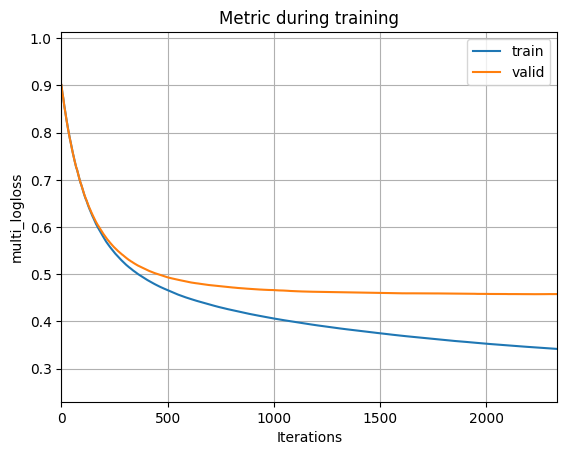

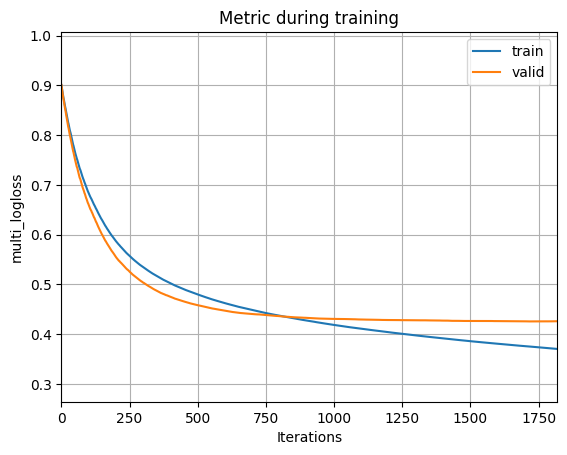

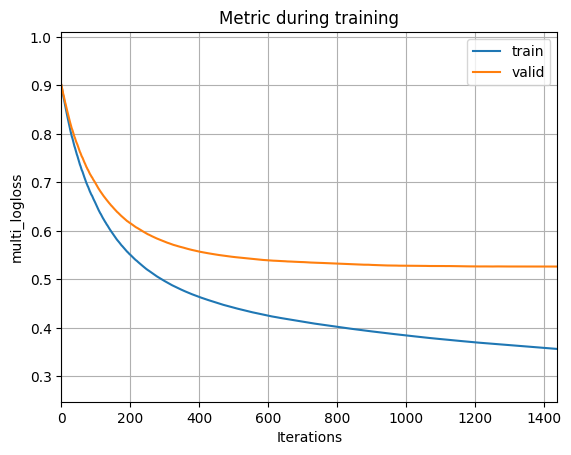

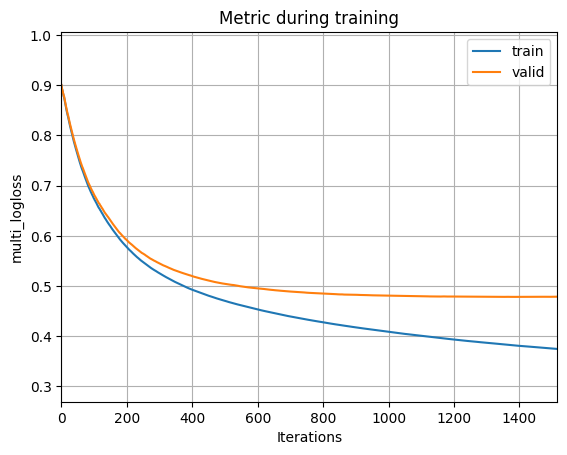

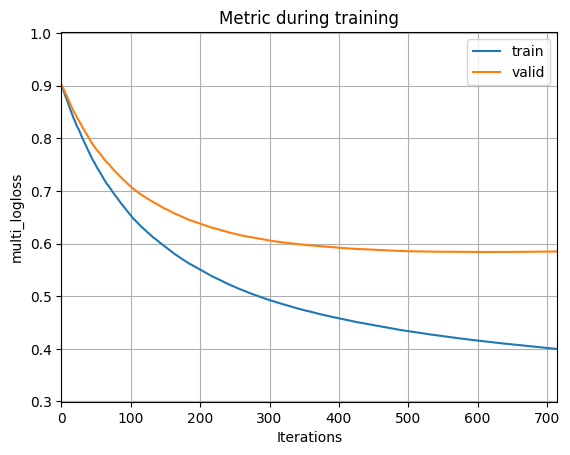

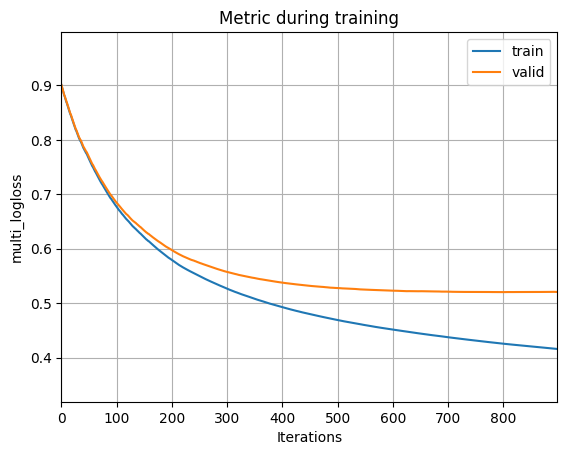

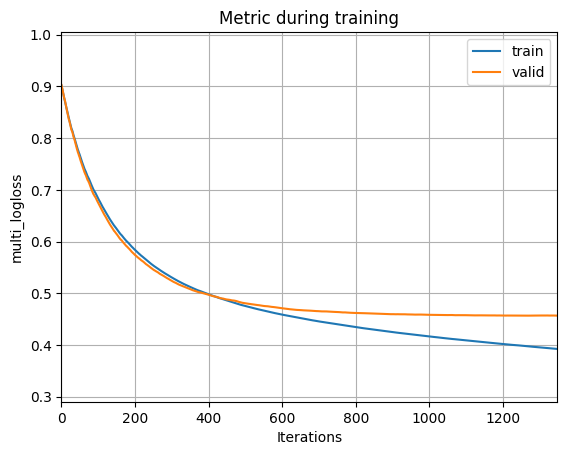

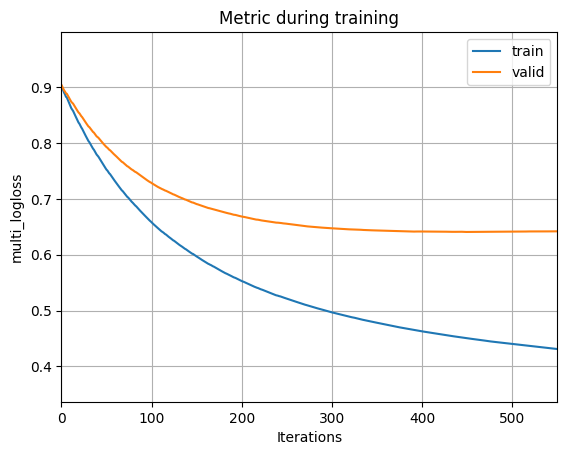

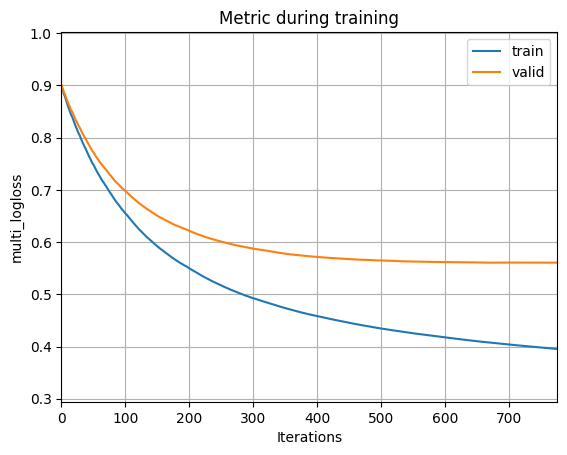

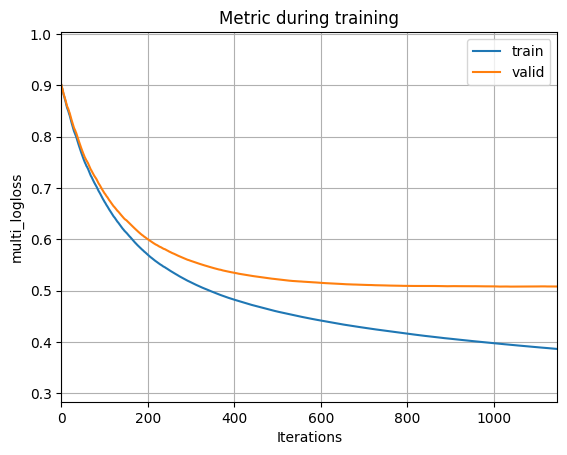

In [23]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

gbm_models = []
cat_models = []
svm_models = []

FOLD = 10

for fold in range(FOLD):
    rus = RandomUnderSampler(
        sampling_strategy={0: 600, 1: 198, 2: 146}, random_state=fold * 123
    )
    X_resampled, Y_resampled = rus.fit_resample(train_features, train_objective)
    X_train, X_valid, Y_train, Y_valid = train_test_split(
        X_resampled,
        Y_resampled,
        test_size=0.2,
        shuffle=True,
        stratify=Y_resampled,
        random_state=fold * 123,
    )

    gbm, proba = train_light_gbm(X_train, Y_train, X_valid, Y_valid, seed=fold * 123)
    gbm_models.append(gbm)

    cat, proba = train_catboost(X_train, Y_train, X_valid, Y_valid, seed=fold * 123)
    cat_models.append(cat)

    svm = train_svm(X_resampled, Y_resampled, seed=fold * 123)
    svm_models.append(svm)


In [24]:
from scipy import stats

def predict_models(
    features,
    gbms: list[lgb.Booster],
    cats: list[catboost.CatBoostRegressor],
    svms: list[SVC],
):
    pred_labels = np.zeros((len(features), len(gbms) + len(cats) + len(svms)))
    for i, model in enumerate(gbms):
        pred_labels[:, i] = model.predict(features)
    for i, model in enumerate(cats):
        pred_labels[:, i + len(gbms)] = np.ravel(model.predict(features))
    for i, model in enumerate(svms):
        pred_labels[:, i + len(gbms) + len(cats)] = model.predict(features)
    return pred_labels


def ensembling_hard(
    features,
    gbms: list[lgb.Booster],
    cats: list[catboost.CatBoostRegressor],
    svms: list[SVC],
):
    pred_labels = predict_models(features, gbms, cats, svms)
    return np.ravel(stats.mode(pred_labels, axis=-1)[0])

In [25]:
predict = ensembling_hard(train_features, gbm_models, cat_models, svm_models)

print(classification_report(train_objective,predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1256
           1       0.64      0.55      0.59       198
           2       0.76      0.87      0.81       146

    accuracy                           0.89      1600
   macro avg       0.78      0.79      0.78      1600
weighted avg       0.89      0.89      0.89      1600



In [26]:
predict = ensembling_hard(test_features, gbm_models, cat_models, svm_models)

result = test_df.select(pl.col("id"), pl.lit(predict).cast(pl.Int32).alias("charges"))

result.write_csv(datasets_path / "predict.csv", include_header=False)

/tmp/ipykernel_47854/813641747.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


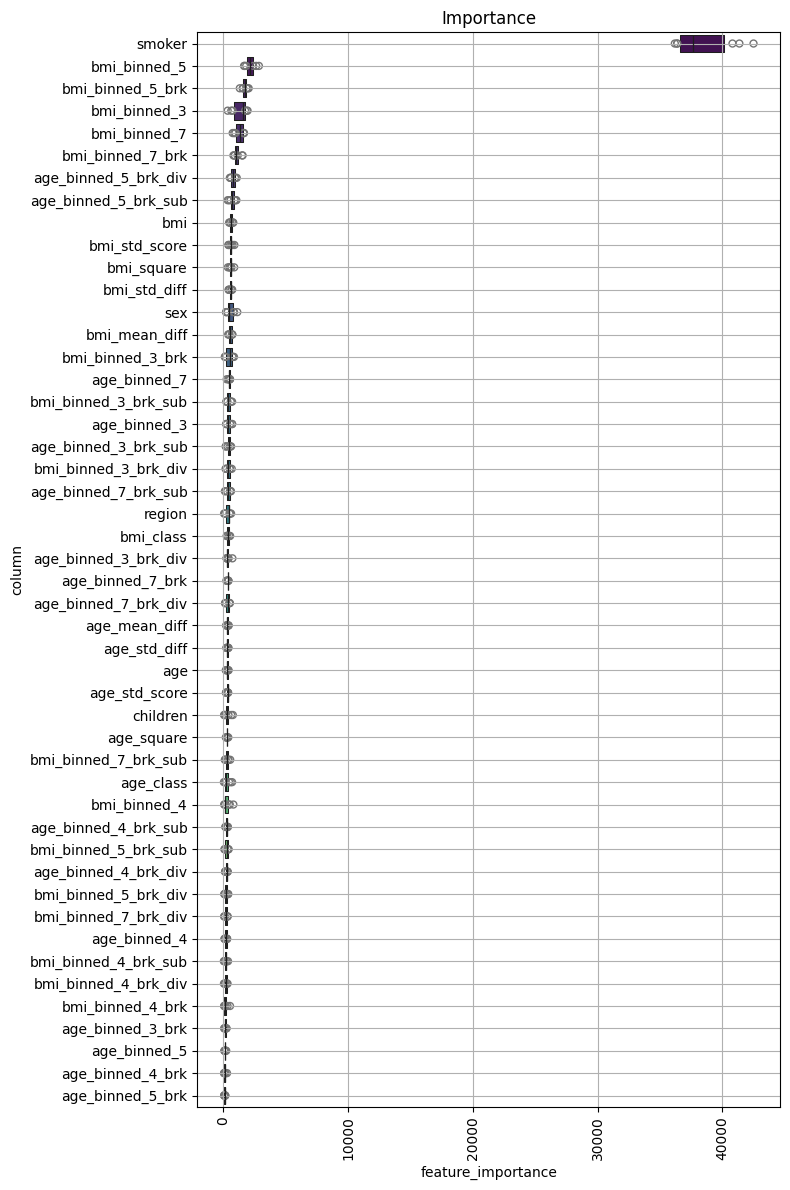

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importances_

        _df["column"] = feat_train_df.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat(
            [feature_importance_df, _df], axis=0, ignore_index=True
        )

    order = (
        feature_importance_df.groupby("column")
        .sum()[["feature_importance"]]
        .sort_values("feature_importance", ascending=False)
        .index[:50]
    )

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * 0.25)))
    sns.boxenplot(
        data=feature_importance_df,
        x="feature_importance",
        y="column",
        order=order,
        ax=ax,
        palette="viridis",
        orient="h",
    )
    ax.tick_params(axis="x", rotation=90)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax


fig, ax = visualize_importance(gbm_models, train_features)